In [1]:
import datetime
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
breast = load_breast_cancer()
X,y = breast.data, breast.target
feature_name = breast.feature_names

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_test,y_test,reference=lgb_train)

In [5]:
# 参数设置
boost_round = 50
early_stop_rounds = 10  # 提前停止轮数  防止过拟合
params = {
    'boosting_type':'gbdt',
    'objective':'regression',
    'metric':{'12','auc'},
    'num_leaves':31,
    'learning_rate':0.05,
    'feature_fraction':0.9,
    'bagging_fraction':0.8,  # 建树的样本采样比例
    'bagging_freq':5,  # k 意味着每k次迭代执行bagging
    'verbose':1  # <0 显示致命的， =0 显示错误（警告），>0 显示信息
}

In [6]:
results = {}
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=boost_round,
    valid_sets=(lgb_eval, lgb_train),
    valid_names=('validate', 'train'),
    early_stopping_rounds=early_stop_rounds,
    evals_result=results
)

[1]	train's auc: 0.98371	validate's auc: 0.977136
Training until validation scores don't improve for 10 rounds
[2]	train's auc: 0.986656	validate's auc: 0.987298
[3]	train's auc: 0.991202	validate's auc: 0.992061
[4]	train's auc: 0.990355	validate's auc: 0.993966
[5]	train's auc: 0.990199	validate's auc: 0.993331
[6]	train's auc: 0.991097	validate's auc: 0.992379
[7]	train's auc: 0.99209	validate's auc: 0.994601
[8]	train's auc: 0.992341	validate's auc: 0.995078
[9]	train's auc: 0.992226	validate's auc: 0.995078
[10]	train's auc: 0.992623	validate's auc: 0.995395
[11]	train's auc: 0.993239	validate's auc: 0.995395
[12]	train's auc: 0.993699	validate's auc: 0.995395
[13]	train's auc: 0.993595	validate's auc: 0.995078
[14]	train's auc: 0.994065	validate's auc: 0.995395
[15]	train's auc: 0.994378	validate's auc: 0.99603
[16]	train's auc: 0.994316	validate's auc: 0.995872
[17]	train's auc: 0.99442	validate's auc: 0.995554
[18]	train's auc: 0.994504	validate's auc: 0.994601
[19]	train's auc

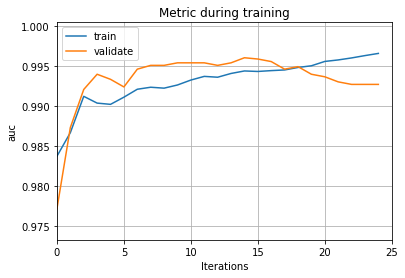

In [7]:
lgb.plot_metric(results)
plt.show()

In [8]:
y_pred = gbm.predict(X_test,num_iteration=gbm.best_iteration)
y_pred

array([0.36871977, 0.78255705, 0.82134143, 0.81158163, 0.79759698,
       0.83224726, 0.82154734, 0.83411952, 0.82048729, 0.83078217,
       0.61345842, 0.805343  , 0.83400798, 0.49235579, 0.59929362,
       0.37350979, 0.76979123, 0.30729053, 0.30639659, 0.29957363,
       0.31997074, 0.32117467, 0.81335679, 0.82633815, 0.37131735,
       0.82771139, 0.82751809, 0.40458641, 0.83005931, 0.29440944,
       0.81881557, 0.34672692, 0.77125415, 0.37772608, 0.82915143,
       0.35673641, 0.79858753, 0.38304288, 0.82162252, 0.31111502,
       0.56764761, 0.83104516, 0.49235579, 0.82963049, 0.57308586,
       0.31235323, 0.82915143, 0.80366961, 0.81311266, 0.3018054 ,
       0.29582697, 0.34179304, 0.3452489 , 0.82800965, 0.83071715,
       0.82204221, 0.80644677, 0.81118283, 0.80212028, 0.29338358,
       0.38117619, 0.29740225, 0.82622724, 0.83215885, 0.30377943,
       0.80960405, 0.2996252 , 0.29392921, 0.29852438, 0.81888357,
       0.55963178, 0.29021295, 0.83324246, 0.71318404, 0.36836

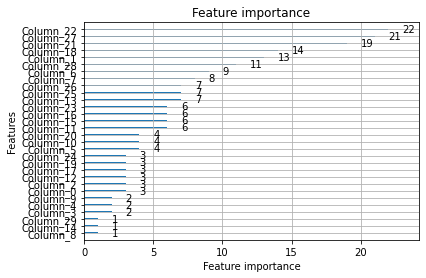

In [9]:
lgb.plot_importance(gbm,importance_type='split')
plt.show()